In [422]:
# Importing libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing the os library specifically for reading the csv once I've created the file in my working directory.
import os

# web-based requests
import requests

# Time based library
import datetime
from time import strftime

In [2]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
print(pd.__version__)

1.1.3


# Exercises

In [4]:
temp_df = data.sf_temps()
temp_df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
temp_df = temp_df.set_index('date').sort_index()

In [6]:
temp_df.isnull().sum()

temp    0
dtype: int64

In [7]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [8]:
# Showing the table of temps, by the average temp per day.
temp_df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


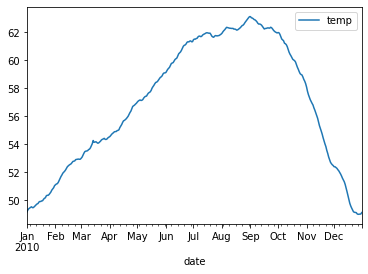

In [9]:
# Plotting

temp_df.resample('D').mean().plot()
plt.show()

#### 2. Write the code necessary to visualize the minimum temperature over time.

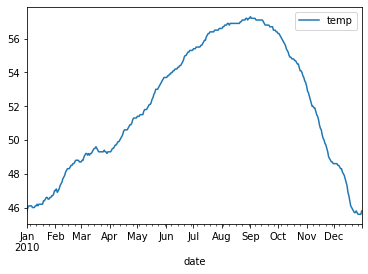

In [10]:
temp_df.resample('D').min().plot()
plt.show()

#### 3. Write the code necessary to visualize the maximum temperature over time.

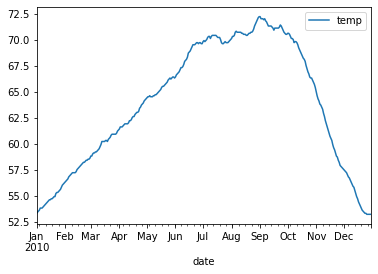

In [11]:
temp_df.resample('D').max().plot()
plt.show()

#### 4. Which month is the coldest, on average?

In [12]:
# I need to find a list of all months, so resample to the average temp of each month, 
# then find the .min() of that new list of monthly averages.

pd.DataFrame(temp_df.resample('M').mean().min(), columns = temp_df.columns)

,temp
temp,49.98414


In [13]:
temp_df.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


January 2010 was the coldest average month, according to this data.

#### 5. Which month has the highest average temperature?

In [14]:
pd.DataFrame(temp_df.resample('M').mean().max(), columns = temp_df.columns)

,temp
temp,62.487083


In [15]:
print("September had the highest average monthly temperatures")

September had the highest average monthly temperatures


#### 6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [16]:
temp_df['2010-01-02'].shape

(24, 1)

In [ ]:
temp_minmax = temp_df.resample('D').agg(['mean', 'max', 'min'])

In [27]:
temp_df = temp_df['temp'].resample('D').agg(['mean', 'max', 'min'])

In [29]:
temp_df.rename({'mean': 'average_temp', 'max': 'max_temp', 'min': 'min_temp'}, inplace = True)
temp_df.head()

,mean,max,min
date,,,
2010-01-01,49.170833,53.3,45.8
2010-01-02,49.304167,53.4,46.0
2010-01-03,49.391667,53.5,46.1
2010-01-04,49.445833,53.6,46.1
2010-01-05,49.491667,53.8,46.1


In [46]:
temp_df['temp_diff'] = temp_df['max'] - temp_df['min']
temp_df.head()

,mean,max,min,temp_diff
date,,,,
2010-01-01,49.170833,53.3,45.8,7.5
2010-01-02,49.304167,53.4,46.0,7.4
2010-01-03,49.391667,53.5,46.1,7.4
2010-01-04,49.445833,53.6,46.1,7.5
2010-01-05,49.491667,53.8,46.1,7.7


In [52]:
# Now need to resample by month so as to find the month with the greatest range in it's min/max.
max_month = (temp_df.temp_diff.resample('M').max()).max()
temp_df.resample('M').max().sort_values(ascending = False, by = 'temp_diff')

,mean,max,min,temp_diff
date,,,,
2010-08-31,63.129167,72.2,57.2,15.0
2010-09-30,63.129167,72.2,57.3,14.9
2010-06-30,61.395833,69.7,55.3,14.8
2010-07-31,61.975000,70.4,56.6,14.8
2010-10-31,61.991667,70.6,56.3,14.4
2010-05-31,59.108333,66.4,53.7,13.1
2010-04-30,56.933333,64.3,51.3,13.0
2010-03-31,54.508333,61.3,49.6,12.0
2010-11-30,58.095833,65.0,53.2,11.8


August is the month with the highest temperature variability

#### 7. Bonus: 
Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [54]:
temp_df.drop(columns = ['temp_diff'], inplace = True)
temp_df

,mean,max,min
date,,,
2010-01-01,49.170833,53.3,45.8
2010-01-02,49.304167,53.4,46.0
2010-01-03,49.391667,53.5,46.1
2010-01-04,49.445833,53.6,46.1
2010-01-05,49.491667,53.8,46.1
...,...,...,...
2010-12-27,48.991667,53.2,45.6
2010-12-28,49.000000,53.2,45.6
2010-12-29,49.012500,53.2,45.6


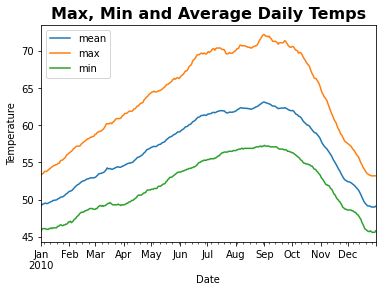

In [61]:
temp_df.plot()
plt.title("Max, Min and Average Daily Temps", fontsize = 16, fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

## Problem Set 2

Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [63]:
from vega_datasets import data
se_df = data.seattle_weather()
se_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [64]:
print(se_df.shape), se_df.info()

(1461, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


(None, None)

In [66]:
se_df = se_df.set_index('date')
se_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


#### 1. Which year and month combination has the highest amount of precipitation?

In [339]:
se_df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [84]:
se_df.resample("M").max().sort_values(ascending = False, by = 'precipitation').head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-03-31,55.9,20.6,10.6,5.7,sun


Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date', ylabel='precipitation'>

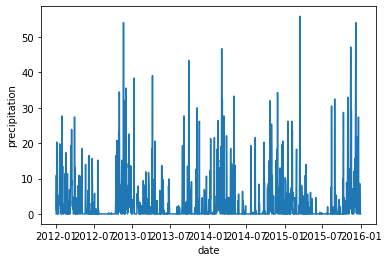

In [87]:
# Basic chart showing the amount of precipitation over time.
sns.lineplot(y = 'precipitation', x = 'date', data = se_df)

In [97]:
# Cumulative average monthly precipitation over time.

se_precip_df = se_df[['precipitation']].resample("M").mean().cumsum()

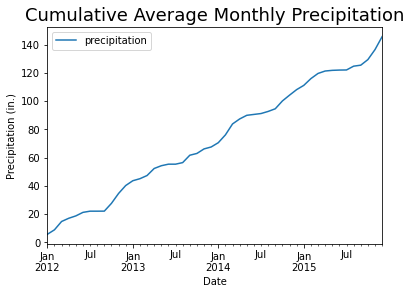

In [102]:
se_precip_df.plot()
plt.title("Cumulative Average Monthly Precipitation", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Precipitation (in.)")
plt.show()

In [110]:
se_df[['precipitation']]
daily_precip['cumulative'] = daily_precip.precipitation.cumsum()

/Users/luke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='date'>

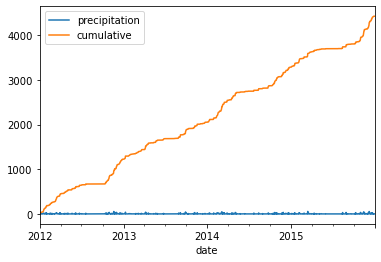

In [112]:
daily_precip.plot()

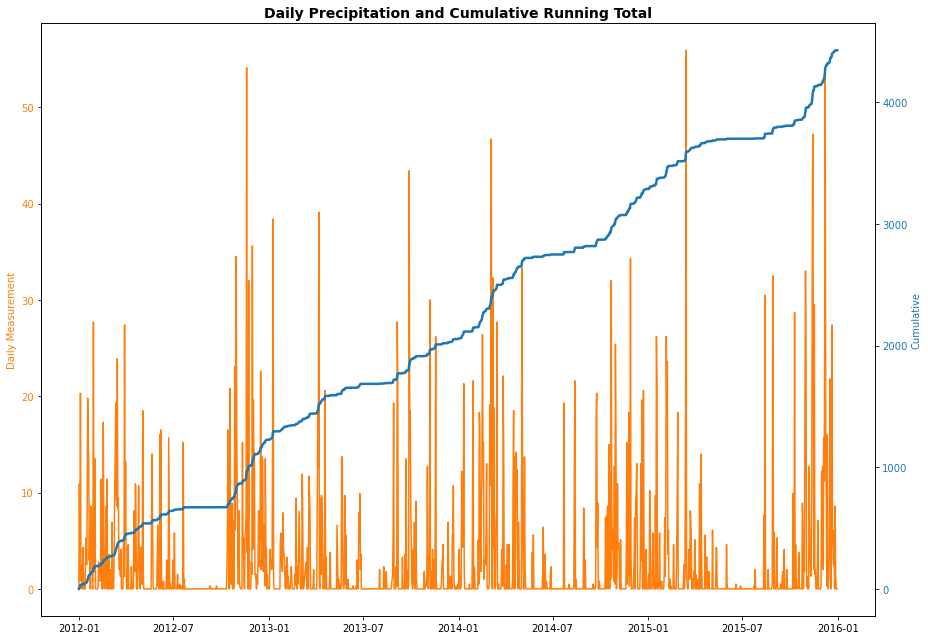

In [420]:
# Creating the data:
data1 = daily_precip.precipitation
data2 = daily_precip.cumulative

fig, ax1 = plt.subplots(figsize = (13, 9))

color = 'tab:orange'
ax1.set_xlabel('')
ax1.set_ylabel('Daily Measurement', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cumulative', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color, linewidth = 2.5, linestyle = "solid")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Daily Precipitation and Cumulative Running Total", fontsize = 14, fontweight = 'bold')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

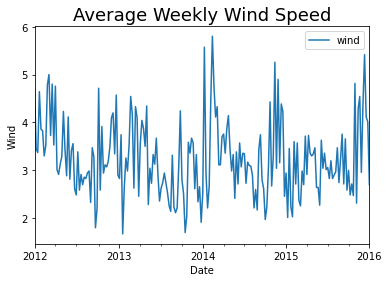

In [158]:
se_df[['wind']].resample("W").mean().plot()
plt.title("Average Weekly Wind Speed", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Wind")
plt.show()

#### Which year-month combination is the windiest?

In [395]:
se_df.wind.resample("M").mean().sort_values(ascending = False).head()

date
2014-02-28    4.528571
2015-12-31    4.341935
2012-03-31    4.248387
2014-11-30    3.983333
2012-02-29    3.903448
Name: wind, dtype: float64

#### What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [187]:
se_df['is_sunny'] = se_df.weather == 'sun'
se_df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [195]:
se_df.resample("Y").is_sunny.max()

date
2012-12-31    True
2013-12-31    True
2014-12-31    True
2015-12-31    True
Freq: A-DEC, Name: is_sunny, dtype: bool

In [399]:
se_df[se_df.weather == 'sun'].resample('Y').count().sort_values(ascending = False, by = 'weather').head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2014-12-31,211,211,211,211,211,211
2013-12-31,205,205,205,205,205,205
2015-12-31,180,180,180,180,180,180
2012-12-31,118,118,118,118,118,118


In [398]:
# Adding the solution:

se_df.is_sunny.resample("Y").sum().sort_values(ascending = False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: is_sunny, dtype: int64

#### In which month does it rain the most?

In [400]:
# Solution

se_month = se_df.copy()

se_month['month'] = se_month.index.month
se_month.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,1
2012-01-02,10.9,10.6,2.8,4.5,rain,False,1
2012-01-03,0.8,11.7,7.2,2.3,rain,False,1
2012-01-04,20.3,12.2,5.6,4.7,rain,False,1
2012-01-05,1.3,8.9,2.8,6.1,rain,False,1


In [402]:
se_month.groupby('month').precipitation.sum().sort_values(ascending = False)

month
11    642.5
12    622.7
3     606.2
10    503.4
1     466.0
2     422.0
4     375.4
9     235.5
5     207.5
8     163.7
6     132.9
7      48.2
Name: precipitation, dtype: float64

In [215]:
# If I want to know which month has the most rain OR drizzle, I'd need a multiple conditional boolean test.

se_df[(se_df.weather == 'rain') | (se_df.weather == 'drizzle')].resample('M').count().sort_values(ascending = False, by = 'weather').head(1)

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-11-30,27,27,27,27,27,27


In [201]:
se_df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

#### Which month has the most number of days with a non-zero amount of precipitation?

In [218]:
se_df[(se_df.precipitation > 0)].shape

(623, 6)

In [221]:
se_df[(se_df.precipitation > 0)].resample("M").sum().shape

(48, 5)

In [228]:
se_df[(se_df.precipitation > 0)].resample("M").sum().sort_values(ascending = False, by = 'precipitation').head()

,precipitation,temp_max,temp_min,wind,is_sunny
date,,,,,
2015-12-31,284.5,220.9,116.6,116.8,2
2014-03-31,240.0,252.8,128.3,81.0,2
2015-11-30,212.6,202.8,97.3,74.8,3
2012-11-30,210.5,246.0,137.3,71.6,0
2012-03-31,183.0,189.5,62.4,95.8,0


In [231]:
se_df[(se_df.precipitation > 0)].resample("M").sum().sort_values(ascending = False, by = 'precipitation').head()

,precipitation,temp_max,temp_min,wind,is_sunny
date,,,,,
2015-12-31,284.5,220.9,116.6,116.8,2
2014-03-31,240.0,252.8,128.3,81.0,2
2015-11-30,212.6,202.8,97.3,74.8,3
2012-11-30,210.5,246.0,137.3,71.6,0
2012-03-31,183.0,189.5,62.4,95.8,0


In [404]:
se_month['did_rain'] = se_month.precipitation > 0
se_month.groupby('month').did_rain.mean()

month
1     0.532258
2     0.646018
3     0.588710
4     0.491667
5     0.274194
6     0.308333
7     0.088710
8     0.177419
9     0.291667
10    0.491935
11    0.591667
12    0.653226
Name: did_rain, dtype: float64

In [405]:
se_month.groupby('month').did_rain.mean().sort_values(ascending = False)

month
12    0.653226
2     0.646018
11    0.591667
3     0.588710
1     0.532258
10    0.491935
4     0.491667
6     0.308333
9     0.291667
5     0.274194
8     0.177419
7     0.088710
Name: did_rain, dtype: float64

## Flight Data

In [273]:
flight_df = data.flights_20k()
flight_df.shape

(20000, 5)

In [274]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [279]:
delay_df = flight_df.copy()
delay_df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [280]:
delay_df = delay_df.set_index('date').sort_index()

In [282]:
delay_df[delay_df.delay < 0]

,delay,distance,origin,destination
date,,,,
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:05:00,-15,677,LAX,ABQ
2001-01-01 07:15:00,-25,2106,BWI,LAS
2001-01-01 07:45:00,-6,904,RDU,MCI
...,...,...,...,...
2001-03-31 20:05:00,-12,621,PHX,SJC
2001-03-31 20:30:00,-11,938,BNA,MHT
2001-03-31 21:05:00,-5,318,FLL,JAX


In [283]:
delay_df[~delay_df.delay < 0]

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 07:00:00,0,303,MSY,HOU
2001-01-01 07:05:00,13,365,JAX,BHM
2001-01-01 07:15:00,24,938,MHT,BNA
...,...,...,...,...
2001-03-31 20:13:00,42,174,PBI,TPA
2001-03-31 20:52:00,45,487,LAS,ABQ
2001-03-31 20:57:00,51,787,BWI,MCO


In [284]:
# This is reason #56,521 why I love python/pandas... doing what .clip does would've taken ages in Excel...

delay_df['delay'] = delay_df['delay'].clip(lower = 0)
delay_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


#### Which hour of the day has the highest average delay?

In [267]:
# flight_df.resample("H").mean().sort_values(ascending = False, by = 'delay').head()

In [297]:
delay_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [298]:
delay_df['hour'] = delay_df.index.hour
delay_df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [314]:
delay_df.groupby('hour').delay.mean().sort_values(ascending = False).head(1)

hour
3    302.5
Name: delay, dtype: float64

In [406]:
delay_hour = delay_df.groupby('hour').delay.mean()

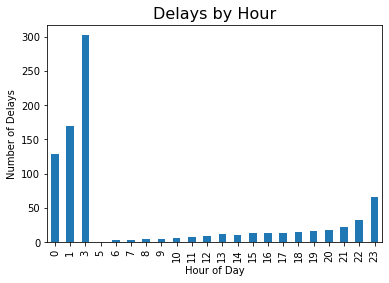

In [407]:
# Do a barplot?

delay_hour.plot.bar()
plt.title("Delays by Hour", fontsize = 16)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Delays")
plt.show()

In [294]:
# I don't have to use the .dt accessor if I'm trying to reference an index that *is already* a 

delay_df.index.hour.shape

(20000,)

#### Does the day of the week make a difference in the delay amount?

In [328]:
# So I want to know the average per day... are they different?

delay_df['day'] = delay_df.index.day_name()
delay_df.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [336]:
delay_df.groupby('day').delay.mean().sort_values(ascending = False)

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

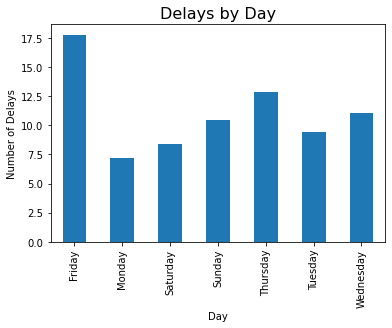

In [338]:
delay_df.groupby('day').delay.mean().plot.bar()
plt.title("Delays by Day", fontsize = 16)
plt.xlabel("Day")
plt.ylabel("Number of Delays")
plt.show()

#### Does the month make a difference in the delay amount?

In [409]:
delay_df.groupby(delay_df.index.month).delay.mean()

date
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

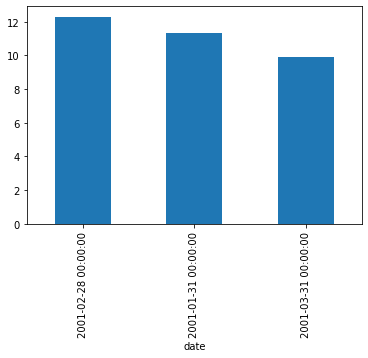

In [353]:
delay_df.resample("M").delay.mean().sort_values(ascending = False).plot.bar()

plt.show()

## Iowa Electricity

In [361]:
iowa = data.iowa_electricity()
iowa.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [359]:
iowa.shape, iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


((51, 3), None)

In [369]:
generate = iowa.copy()
generate = generate.set_index('year').sort_index()
generate

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574
2002-01-01,Renewables,1963
2003-01-01,Fossil Fuels,36234
2003-01-01,Nuclear Energy,3988
2003-01-01,Renewables,1885


In [392]:
generate.groupby(['source', 'net_generation']).sum()

Empty DataFrame
Columns: []
Index: [(Fossil Fuels, 28437), (Fossil Fuels, 29329), (Fossil Fuels, 32319), (Fossil Fuels, 34873), (Fossil Fuels, 35250), (Fossil Fuels, 35361), (Fossil Fuels, 35991), (Fossil Fuels, 36205), (Fossil Fuels, 36234), (Fossil Fuels, 36883), (Fossil Fuels, 37014), (Fossil Fuels, 37379), (Fossil Fuels, 38620), (Fossil Fuels, 39361), (Fossil Fuels, 41389), (Fossil Fuels, 42734), (Fossil Fuels, 42750), (Nuclear Energy, 3853), (Nuclear Energy, 3988), (Nuclear Energy, 4152), (Nuclear Energy, 4347), (Nuclear Energy, 4451), (Nuclear Energy, 4519), (Nuclear Energy, 4538), (Nuclear Energy, 4574), (Nuclear Energy, 4679), (Nuclear Energy, 4703), (Nuclear Energy, 4929), (Nuclear Energy, 5095), (Nuclear Energy, 5214), (Nuclear Energy, 5215), (Nuclear Energy, 5243), (Nuclear Energy, 5282), (Nuclear Energy, 5321), (Renewables, 1437), (Renewables, 1885), (Renewables, 1963), (Renewables, 2102), (Renewables, 2724), (Renewables, 3364), (Renewables, 3870), (Renewables, 5070), (Renewables, 8560), (Renewables, 10308), (Renewables, 11795), (Renewables, 14949), (Renewables, 16476), (Renewables, 17452), (Renewables, 19091), (Renewables, 21241), (Renewables, 21933)]

In [411]:
total_energy = iowa.groupby('year').sum()

In [415]:
iowa = iowa.merge(total_energy, left_on = 'year', right_on = "year")
iowa

,year,source,net_generation_x,net_generation_y
0,2001-01-01,Fossil Fuels,35361,40651
1,2001-01-01,Nuclear Energy,3853,40651
2,2001-01-01,Renewables,1437,40651
3,2002-01-01,Fossil Fuels,35991,42528
4,2002-01-01,Nuclear Energy,4574,42528
5,2002-01-01,Renewables,1963,42528
6,2003-01-01,Fossil Fuels,36234,42107
7,2003-01-01,Nuclear Energy,3988,42107
8,2003-01-01,Renewables,1885,42107
9,2004-01-01,Fossil Fuels,36205,43236


In [418]:
iowa.rename(columns = {'net_generation_y': 'total_energy', 'net_generation_x': 'net_generation'}, inplace = True)
iowa.columns

Index(['year', 'source', 'net_generation', 'total_energy'], dtype='object')

In [419]:
iowa.head()

,year,source,net_generation,total_energy
0,2001-01-01,Fossil Fuels,35361,40651
1,2001-01-01,Nuclear Energy,3853,40651
2,2001-01-01,Renewables,1437,40651
3,2002-01-01,Fossil Fuels,35991,42528
4,2002-01-01,Nuclear Energy,4574,42528


In [421]:
iowa['energy_percent'] = iowa.net_generation / iowa.total_energy
iowa.head()

,year,source,net_generation,total_energy,energy_percent
0,2001-01-01,Fossil Fuels,35361,40651,0.869868
1,2001-01-01,Nuclear Energy,3853,40651,0.094782
2,2001-01-01,Renewables,1437,40651,0.035350
3,2002-01-01,Fossil Fuels,35991,42528,0.846290
4,2002-01-01,Nuclear Energy,4574,42528,0.107553
